In [1]:
import pandas as pd
import numpy as np
import nltk
import contractions
import matplotlib.pyplot as plt

from string import punctuation
from collections import Counter
import seaborn as sns

In [2]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gehna\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gehna\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gehna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
train_df = pd.read_csv('LLM_vs_human_train_50k.csv')
test_df = pd.read_csv('LLM_vs_human_test_1k.csv')
val_df = pd.read_csv('LLM_vs_human_val_1k.csv')

In [4]:
df = pd.concat([train_df,val_df,test_df], axis = 0)

In [5]:
df.reset_index(inplace = True)
df.drop(['index', 'Unnamed: 0'], axis = 1, inplace = True)

In [6]:
df

,text,source,label
0,I'm not happy with what I've wrote to be hones...,Human,0
1,Postmodernist Anthropology and its Impact on T...,Human,0
2,"Firstly, is it okay to write an essay or does ...",Human,0
3,Nissan Company’s Operational Changes and Manag...,Human,0
4,I think some people might find visiting a nati...,Human,0
...,...,...,...
51995,The cybersecurity community is abuzz with the ...,GPT-3.5,1
51996,"As a language model AI, I cannot agree or disa...",GPT-3.5,1
51997,The night was falling on the western hemispher...,GPT-3.5,1
51998,The Pirate Bay (TPB) has been able to continue...,GPT-3.5,1


In [8]:
df['text_lower'] = df['text'].str.lower()

In [10]:
tokenized = []
word_count = []
stop_words_counts = []
for i in range(len(df['text_lower'])):
    de_contracted = contractions.fix(df['text_lower'][i])
    tokenized.append(word_tokenize(de_contracted)[0:1000])
    stop_words_counts.append({word: tokenized[i].count(word) for word in tokenized[i] if word in stop_words})
    word_count.append(len(tokenized[i]))
df['tokenized_text'] = tokenized
df['word_count'] = word_count
df['stop_words_counts'] = stop_words_counts

In [14]:
df

,text,source,label,text_lower,tokenized_text,word_count,stop_words_counts
0,I'm not happy with what I've wrote to be hones...,Human,0,i'm not happy with what i've wrote to be hones...,"[i, am, not, happy, with, what, i, have, wrote...",1067,"{'i': 5, 'am': 1, 'not': 12, 'with': 10, 'what..."
1,Postmodernist Anthropology and its Impact on T...,Human,0,postmodernist anthropology and its impact on t...,"[postmodernist, anthropology, and, its, impact...",1179,"{'and': 29, 'its': 6, 'on': 11, 'it': 12, 'be'..."
2,"Firstly, is it okay to write an essay or does ...",Human,0,"firstly, is it okay to write an essay or does ...","[firstly, ,, is, it, okay, to, write, an, essa...",146,"{'is': 1, 'it': 1, 'to': 7, 'an': 3, 'or': 1, ..."
3,Nissan Company’s Operational Changes and Manag...,Human,0,nissan company’s operational changes and manag...,"[nissan, company, ’, s, operational, changes, ...",1197,"{'s': 1, 'and': 42, 'that': 19, 'to': 41, 'its..."
4,I think some people might find visiting a nati...,Human,0,i think some people might find visiting a nati...,"[i, think, some, people, might, find, visiting...",477,"{'i': 8, 'some': 1, 'a': 12, 'because': 7, 'it..."
...,...,...,...,...,...,...,...
51995,The cybersecurity community is abuzz with the ...,GPT-3.5,1,the cybersecurity community is abuzz with the ...,"[the, cybersecurity, community, is, abuzz, wit...",260,"{'the': 16, 'is': 3, 'with': 2, 'of': 7, 'a': ..."
51996,"As a language model AI, I cannot agree or disa...",GPT-3.5,1,"as a language model ai, i cannot agree or disa...","[as, a, language, model, ai, ,, i, can, not, a...",441,"{'as': 4, 'a': 18, 'i': 3, 'can': 6, 'not': 7,..."
51997,The night was falling on the western hemispher...,GPT-3.5,1,the night was falling on the western hemispher...,"[the, night, was, falling, on, the, western, h...",167,"{'the': 8, 'was': 3, 'on': 1, 'of': 1, 'with':..."
51998,The Pirate Bay (TPB) has been able to continue...,GPT-3.5,1,the pirate bay (tpb) has been able to continue...,"[the, pirate, bay, (, tpb, ), has, been, able,...",137,"{'the': 4, 'has': 5, 'been': 3, 'to': 12, 'it'..."


In [11]:
concat_df_list = []

for stop_dict in df['stop_words_counts'].values:
    concat_df_list.append(pd.DataFrame(stop_dict, index=[0]))

final_dataframe = pd.concat(concat_df_list, ignore_index=True).fillna(0).astype(int)

df = pd.concat([df, final_dataframe.astype(int)], axis=1).fillna(0)

In [12]:
final_dataframe

,i,am,not,with,what,have,to,be,do,its,...,ve,ain,mightn,yourselves,aren,hasn,isn,shan,wouldn,doesn
0,3,1,12,9,4,3,42,9,4,12,...,0,0,0,0,0,0,0,0,0,0
1,0,0,6,5,2,1,18,4,0,5,...,0,0,0,0,0,0,0,0,0,0
2,9,0,2,1,1,2,7,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,5,0,10,37,0,0,14,...,0,0,0,0,0,0,0,0,0,0
4,8,0,3,2,1,3,12,1,2,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51995,0,0,0,2,0,1,11,3,0,1,...,0,0,0,0,0,0,0,0,0,0
51996,3,0,7,5,0,11,18,5,1,0,...,0,0,0,0,0,0,0,0,0,0
51997,0,0,1,3,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51998,0,0,4,0,0,0,12,0,0,2,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df

,text,source,label,text_lower,tokenized_text,word_count,stop_words_counts,i,am,not,...,ve,ain,mightn,yourselves,aren,hasn,isn,shan,wouldn,doesn
0,I'm not happy with what I've wrote to be hones...,Human,0,i'm not happy with what i've wrote to be hones...,"[i, am, not, happy, with, what, i, have, wrote...",1000,"{'i': 3, 'am': 1, 'not': 12, 'with': 9, 'what'...",3,1,12,...,0,0,0,0,0,0,0,0,0,0
1,Postmodernist Anthropology and its Impact on T...,Human,0,postmodernist anthropology and its impact on t...,"[postmodernist, anthropology, and, its, impact...",1000,"{'and': 19, 'its': 5, 'on': 8, 'it': 9, 'be': ...",0,0,6,...,0,0,0,0,0,0,0,0,0,0
2,"Firstly, is it okay to write an essay or does ...",Human,0,"firstly, is it okay to write an essay or does ...","[firstly, ,, is, it, okay, to, write, an, essa...",163,"{'is': 1, 'it': 1, 'to': 7, 'an': 3, 'or': 1, ...",9,0,2,...,0,0,0,0,0,0,0,0,0,0
3,Nissan Company’s Operational Changes and Manag...,Human,0,nissan company’s operational changes and manag...,"[nissan, company, ’, s, operational, changes, ...",1000,"{'s': 1, 'and': 34, 'that': 13, 'to': 37, 'its...",0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,I think some people might find visiting a nati...,Human,0,i think some people might find visiting a nati...,"[i, think, some, people, might, find, visiting...",517,"{'i': 8, 'some': 1, 'a': 12, 'because': 7, 'it...",8,0,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51995,The cybersecurity community is abuzz with the ...,GPT-3.5,1,the cybersecurity community is abuzz with the ...,"[the, cybersecurity, community, is, abuzz, wit...",287,"{'the': 16, 'is': 3, 'with': 2, 'of': 7, 'a': ...",0,0,0,...,0,0,0,0,0,0,0,0,0,0
51996,"As a language model AI, I cannot agree or disa...",GPT-3.5,1,"as a language model ai, i cannot agree or disa...","[as, a, language, model, ai, ,, i, can, not, a...",491,"{'as': 4, 'a': 18, 'i': 3, 'can': 6, 'not': 7,...",3,0,7,...,0,0,0,0,0,0,0,0,0,0
51997,The night was falling on the western hemispher...,GPT-3.5,1,the night was falling on the western hemispher...,"[the, night, was, falling, on, the, western, h...",198,"{'the': 8, 'was': 3, 'on': 1, 'of': 1, 'with':...",0,0,1,...,0,0,0,0,0,0,0,0,0,0
51998,The Pirate Bay (TPB) has been able to continue...,GPT-3.5,1,the pirate bay (tpb) has been able to continue...,"[the, pirate, bay, (, tpb, ), has, been, able,...",150,"{'the': 4, 'has': 5, 'been': 3, 'to': 12, 'it'...",0,0,4,...,0,0,0,0,0,0,0,0,0,0


In [14]:
punc_count = []
for i,f in enumerate(df['text_lower']):
    c = Counter(c for line in f for c in line if c in punctuation)
    count_punc = np.zeros(len(punctuation),int)
    for mark, count in c.items():
        for j in range(len(punctuation)):
            if mark == punctuation[j]:
                count_punc[j] = count
    punc_count.append(count_punc)

In [15]:
word_tokenize(punctuation)

['!',
 '``',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-./',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [16]:
punc = ['!',
 '``',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [17]:
len(punc)

32

In [18]:
punc_df = pd.DataFrame(punc_count, columns = punc)

In [19]:
punc_df

,!,``,#,$,%,&,',(,),*,...,[,\,],^,_,`,{,|,},~
0,0,19,0,0,0,0,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,6,6,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
3,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51995,0,4,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
51996,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51997,0,0,0,0,0,0,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51998,0,0,0,0,0,0,2,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
df['Punctuation_Count'] = punc_count

In [21]:
cat_punc_df = pd.concat([df,punc_df],axis=1)

In [26]:
len(final_dataframe.columns)

125

In [26]:
punctuation_graph_list = ['``',"'",'-',';','?','*']

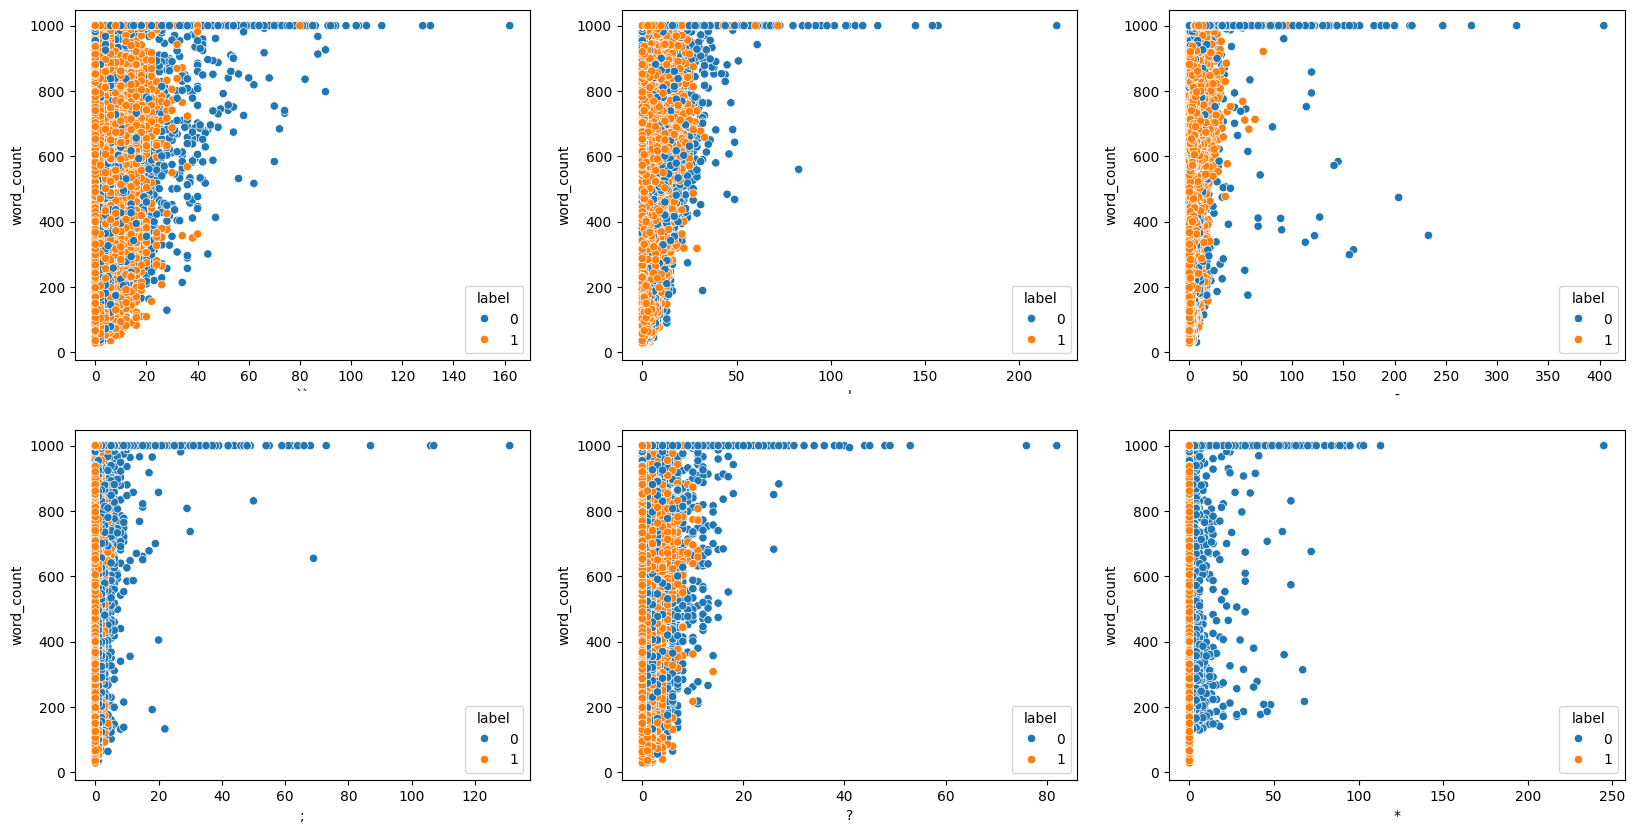

In [30]:
rows = 2
cols = 3
col_name = punc
fig, axes = plt.subplots(rows,cols, figsize=(20,10))
for i in range(rows):
    for j in range(cols):
        sns.scatterplot(data=cat_punc_df, x = punctuation_graph_list[(j)+(i*3)], y = "word_count", hue = 'label', ax = axes[i,j])

In [41]:
print(final_dataframe.columns.values)

['in' 'the' 'is' 'to' 'a' 'of' 'such' 'that' 'can' 'be' 'if' 'an' 'and'
 'this' 'under' 'o' 'both' 'for' 'we' 'you' 'when' 'where' 'all' 'any'
 'out' 'just' 'as' 'which' 'with' 'our' 'it' 'are' 'being' 'by' 'there'
 'has' 'its' 'on' 'was' 'from' 'than' 'or' 'because' 'these' 'do' 'were'
 'they' 'their' 'at' 'most' 'between' 'more' 'them' 'does' 'not' 'into'
 'while' 'been' 'have' 'over' 'how' 'each' 'very' 'why' 'then' 'other'
 'will' 'no' 'about' 'before' 'so' 'through' 'only' 'above' 'i' 'few'
 'further' 're' 'but' 'some' 'during' 'up' 'same' 'd' 'having' 'those'
 'here' 'had' 'against' 'm' 's' 'nor' 'he' 'who' 'down' 'off' 'what' 't'
 'below' 'after' 'should' 'now' 'own' 'too' 'itself' 'she' 'him' 'did'
 'me' 'once' 'until' 'again' 'ours' 'himself' 'her' 'doing' 'y' 'your'
 'am' 'my' 'myself' 'yourself' 'his' 'won' 'themselves']


In [32]:
stop_words_graph_list = ['i','not','to','of','his','in','was','the']

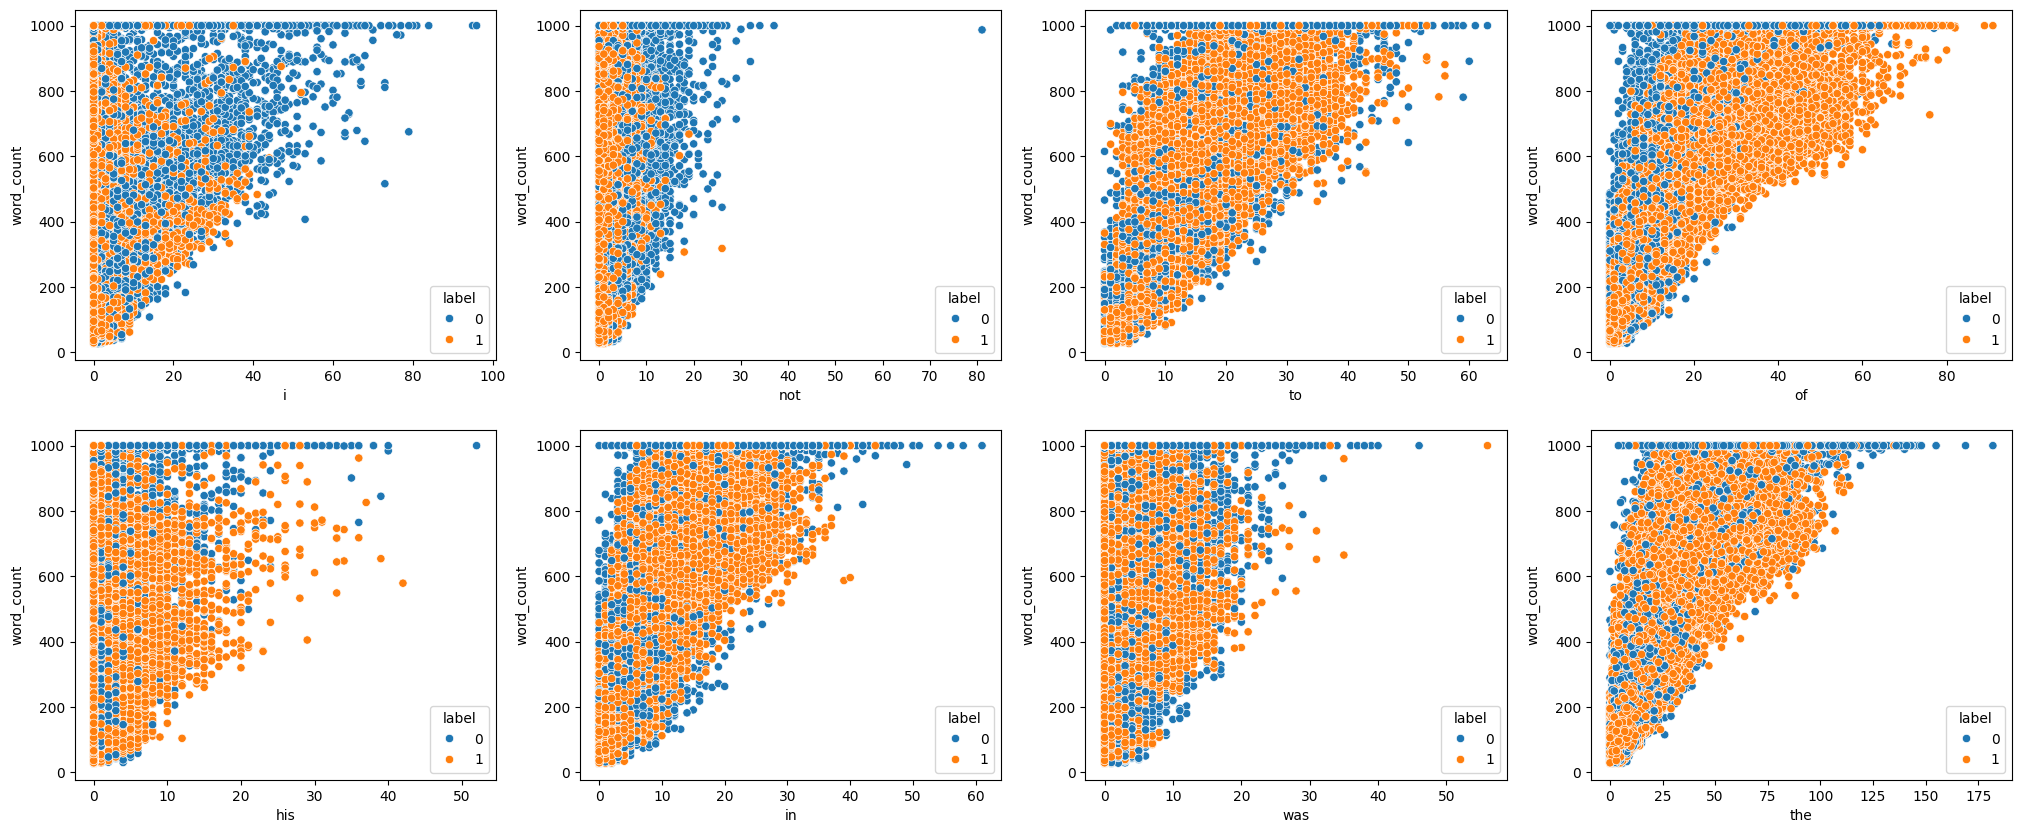

In [33]:
rows = 2
cols = 4
col_name = final_dataframe.columns
fig, axes = plt.subplots(rows,cols, figsize=(25,10))
for i in range(rows):
    for j in range(cols):
        sns.scatterplot(data=df, x = stop_words_graph_list[(j)+(i*4)], y = "word_count", hue = 'label', ax = axes[i,j])

<Axes: xlabel='themselves', ylabel='word_count'>

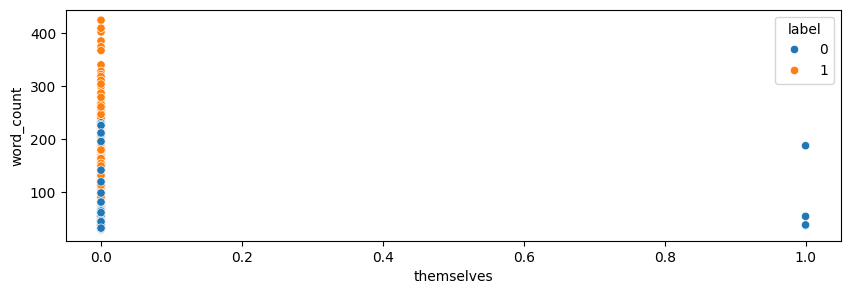

In [66]:
fig, axes = plt.subplots(1,1, figsize=(10,3))
sns.scatterplot(data=df_stop, x = 'themselves', y = "word_count", hue = 'label', ax = axes)

In [78]:
df_try = df[:312]

In [79]:
df_try['no_mistakes'] = no_mistakes

C:\Users\gehna\AppData\Local\Temp\ipykernel_24724\166502575.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_try['no_mistakes'] = no_mistakes


In [81]:
df_try

,index,text,label,src,text_lower,tokenized_text,word_count,stop_words_counts,Punctuation_Count,no_mistakes
0,6665,"In the planar range skyline reporting problem,...",1,sci_gen_human,"in the planar range skyline reporting problem,...","[in, the, planar, range, skyline, reporting, p...",385,"{'in': 11, 'the': 17, 'is': 9, 'to': 6, 'a': 1...","[0, 0, 0, 0, 0, 0, 0, 22, 23, 0, 0, 25, 14, 15...",35
1,6666,Uses of underwater videos to assess diversity ...,1,sci_gen_human,uses of underwater videos to assess diversity ...,"[uses, of, underwater, videos, to, assess, div...",184,"{'of': 9, 'to': 4, 'and': 9, 'are': 3, 'being'...","[0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 4, 5, 12, 0,...",8
2,6667,Synthesizing physiologically-accurate human mo...,1,sci_gen_human,synthesizing physiologically-accurate human mo...,"[synthesizing, physiologically-accurate, human...",177,"{'in': 5, 'a': 8, 'of': 6, 'can': 2, 'or': 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 13, 4, 7, 0,...",6
3,6668,An adaptive distributed space-time coding (DST...,1,sci_gen_human,an adaptive distributed space-time coding (dst...,"[an, adaptive, distributed, space-time, coding...",197,"{'an': 5, 'is': 4, 'for': 4, 'and': 5, 'are': ...","[0, 0, 0, 0, 0, 0, 0, 5, 5, 0, 0, 1, 6, 10, 0,...",15
4,6669,Probabilistic models with hierarchical-latent-...,1,sci_gen_human,probabilistic models with hierarchical-latent-...,"[probabilistic, models, with, hierarchical-lat...",140,"{'with': 4, 'the': 5, 'most': 1, 'to': 4, 'suc...","[0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 7, 12, 5, 0,...",16
...,...,...,...,...,...,...,...,...,...,...
307,6972,Multi-object tracking has recently become an i...,1,sci_gen_human,multi-object tracking has recently become an i...,"[multi-object, tracking, has, recently, become...",115,"{'has': 1, 'an': 1, 'of': 2, 'for': 2, 'is': 2...","[0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 7, 9, 5, 0, ...",9
308,6973,We prove that for every proper minor-closed cl...,1,sci_gen_human,we prove that for every proper minor-closed cl...,"[we, prove, that, for, every, proper, minor-cl...",94,"{'we': 2, 'that': 4, 'for': 4, 'm': 1, 'of': 1...","[0, 0, 0, 0, 0, 0, 0, 5, 1, 0, 0, 7, 5, 4, 0, ...",15
309,6974,Local perturbations of an infinitely long rod ...,1,sci_gen_human,local perturbations of an infinitely long rod ...,"[local, perturbations, of, an, infinitely, lon...",105,"{'of': 4, 'an': 1, 'to': 4, 'on': 1, 'the': 10...","[0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 3, 6, 0, ...",8
310,6975,"Despite continuously improving performance, co...",1,sci_gen_human,"despite continuously improving performance, co...","[despite, continuously, improving, performance...",153,"{'are': 2, 'to': 6, 'that': 4, 'not': 3, 'in':...","[0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 6, 0, ...",4


<Axes: xlabel='no_of_mistakes', ylabel='word_count'>

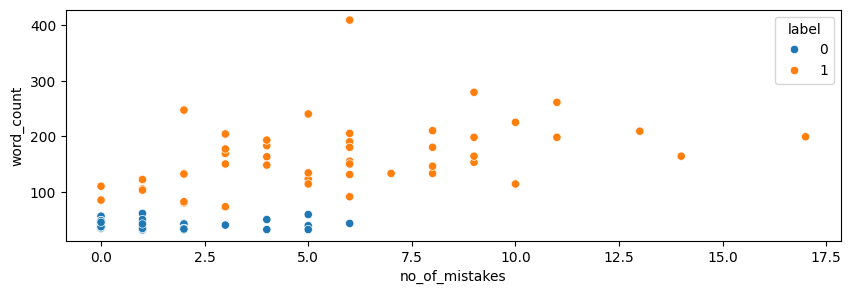

In [8]:
fig, axes = plt.subplots(1,1, figsize=(10,3))
sns.scatterplot(data=df, x = 'no_of_mistakes', y = "word_count", hue = 'label', ax = axes)

In [10]:
df['tokenized_text'][98]

['``',
 'normal',
 "''",
 '(',
 'adj',
 '.',
 ')',
 'conforming',
 'to',
 'the',
 'standard',
 'or',
 'common',
 'type',
 '.',
 'by',
 'the',
 'above',
 'definition',
 ',',
 'we',
 'can',
 'be',
 'sure',
 'that',
 'there',
 'is',
 "a'normal",
 "'",
 'human',
 'being',
 '.',
 'or',
 'at',
 'the',
 'very',
 'least',
 ',',
 "various'normal",
 "'",
 'states',
 'human',
 'being']

In [15]:
df

,index,text,label,src,text_lower,tokenized_text,word_count,stop_words_counts,no_of_mistakes
0,7115,Artificial life originated and has long studie...,1,sci_gen_human,artificial life originated and has long studie...,"[artificial, life, originated, and, has, long,...",209,"{'and': 6, 'has': 3, 'the': 13, 'of': 9, 'whic...",14
1,7116,We study the following variant of the classic ...,1,sci_gen_human,we study the following variant of the classic ...,"[we, study, the, following, variant, of, the, ...",169,"{'we': 2, 'the': 11, 'of': 6, 'is': 3, 'a': 3,...",7
2,7117,Despite substantial progress in signal source ...,1,sci_gen_human,despite substantial progress in signal source ...,"[despite, substantial, progress, in, signal, s...",132,"{'in': 3, 'for': 3, 'to': 4, 'can': 1, 'a': 4,...",8
3,7118,Recommender systems (RS) are increasingly pres...,1,sci_gen_human,recommender systems (rs) are increasingly pres...,"[recommender, systems, (, rs, ), are, increasi...",190,"{'are': 3, 'in': 4, 'our': 1, 'the': 10, 'of':...",15
4,7119,The introduction of LTE over unlicensed bands ...,1,sci_gen_human,the introduction of lte over unlicensed bands ...,"[the, introduction, of, lte, over, unlicensed,...",198,"{'the': 11, 'of': 10, 'over': 1, 'will': 1, 't...",21
...,...,...,...,...,...,...,...,...,...
95,7210,"Alright, so, I was challenged by a friend of m...",0,cmv_machine_continuation_t0_11b,"alright, so, i was challenged by a friend of m...","[alright, ,, so, ,, i, was, challenged, by, a,...",37,"{'so': 1, 'i': 3, 'was': 1, 'by': 1, 'a': 2, '...",0
96,7211,before you guys bombard me with downvotes I wo...,0,cmv_machine_continuation_t0_11b,before you guys bombard me with downvotes i wo...,"[before, you, guys, bombard, me, with, downvot...",37,"{'before': 1, 'you': 1, 'me': 1, 'with': 1, 'i...",1
97,7212,Recently I have begun to fell that when news o...,0,cmv_machine_continuation_t0_11b,recently i have begun to fell that when news o...,"[recently, i, have, begun, to, fell, that, whe...",45,"{'i': 1, 'have': 1, 'to': 1, 'that': 1, 'when'...",0
98,7213,"""Normal"" (adj.) Conforming to the standard or ...",0,cmv_machine_continuation_t0_11b,"""normal"" (adj.) conforming to the standard or ...","[``, normal, '', (, adj, ., ), conforming, to,...",32,"{'to': 1, 'the': 3, 'or': 2, 'by': 1, 'above':...",5
